# 課程目標

利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響

# 範例重點: 
    
    模型架構的層數
    
    使用何種LOSS function

In [1]:
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
import logging
import tensorflow as tf

tf.get_logger().setLevel(logging.ERROR)
np.random.seed(10)

Using TensorFlow backend.


In [2]:
# 載入 cifar10 資料集
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

# 查詢檔案維度資訊
print(f"Shape of x_img_train: {x_img_train.shape}")
print(f"Shape of y_label_train: {y_label_train.shape}")
print(f"Shape of x_img_test: {x_img_test.shape}")
print(f"Shape of y_label_test: {y_label_test.shape}")

170500096/170498071 [==============================] - 13s 0us/step
Shape of x_img_train: (50000, 32, 32, 3)
Shape of y_label_train: (50000, 1)
Shape of x_img_test: (10000, 32, 32, 3)
Shape of y_label_test: (10000, 1)


In [3]:
# 正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
print(f"Before normalized: shape = {x_img_train.shape} \nfirst pixle: {x_img_train[0][0][0]}")
print(f"After normalized: shape = {x_img_train_normalize.shape} \nfirst pixle: {x_img_train_normalize[0][0][0]}\n")

# OneHot Encoding
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
print(f"Before OneHot Encodeing: shape = {y_label_train.shape} \nfirst data: {y_label_train[0]}")
print(f"After OneHot Encodeing: shape = {y_label_train_OneHot.shape} \nfirst data: {y_label_train_OneHot[0]}")

Before normalized: shape = (50000, 32, 32, 3) 
first pixle: [59 62 63]
After normalized: shape = (50000, 32, 32, 3) 
first pixle: [0.23137255 0.24313726 0.24705882]

Before OneHot Encodeing: shape = (50000, 1) 
first data: [6]
After OneHot Encodeing: shape = (50000, 10) 
first data: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [5]:
# 宣告採用序列模型
model = Sequential()

# 建立卷積層 1~4 與池化層 1~4
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())

# 建立全網路連接層
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))

# 建立輸出層
model.add(Dense(10, activation='softmax'))

# 模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)        

In [6]:
# 模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.25, epochs=12, batch_size=128, verbose=1)         

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 19s 515us/step - loss: 1.6182 - acc: 0.3966 - val_loss: 1.2867 - val_acc: 0.5276
Epoch 2/12
37500/37500 [==============================] - 5s 125us/step - loss: 1.1557 - acc: 0.5803 - val_loss: 1.0265 - val_acc: 0.6386
Epoch 3/12
37500/37500 [==============================] - 5s 126us/step - loss: 0.9314 - acc: 0.6668 - val_loss: 0.9213 - val_acc: 0.6798
Epoch 4/12
37500/37500 [==============================] - 5s 124us/step - loss: 0.7748 - acc: 0.7294 - val_loss: 0.8440 - val_acc: 0.7057
Epoch 5/12
37500/37500 [==============================] - 5s 125us/step - loss: 0.6532 - acc: 0.7706 - val_loss: 0.8247 - val_acc: 0.7191
Epoch 6/12
37500/37500 [==============================] - 5s 125us/step - loss: 0.5443 - acc: 0.8117 - val_loss: 0.8118 - val_acc: 0.7270
Epoch 7/12
37500/37500 [==============================] - 5s 125us/step - loss: 0.4462 - acc: 0.8445 - val_loss: 0.8222 -

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

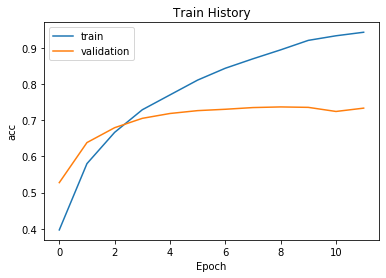

In [8]:
show_train_history(train_history, 'acc', 'val_acc')